In [1]:
#spreading.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 18 October 2017.
#simulate the viscous radial spreading of an initially narrow circular ringlet

In [82]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [92]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)

In [93]:
print radial_width, total_ring_mass, shear_viscosity
print a.min(), a.max(), e.min(), e.max()

0.0001 1e-10 1e-13
0.999716774852 1.00058600782 7.63833440942e-14 0.000392087266652


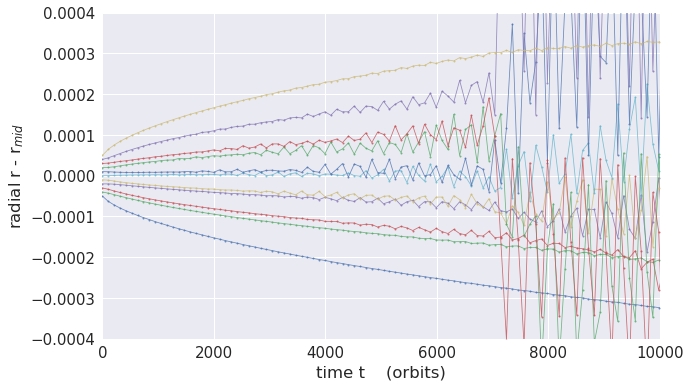

In [94]:
#plot r(theta)
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
for pidx in range(len(r[0])):
    dr = r[:, pidx].flatten() - r[0, len(r[0])/2].flatten()
    ax.plot(times/(2.0*np.pi), dr, marker='o', markersize=2, linestyle='-', linewidth=0.8, alpha=0.8)
ax.set_xlim(-10, 10000)
ax.set_ylim(-0.0004, 0.0004)
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('radial r - r$_{mid}$')